### Problem 1 a)

### Pleiades:

In order to investigate the color magnitude-diagram (cmd) of the Pleiades, we query a search centered on the Pleiades with the Gaia DR2 catalogue. The Pleiades which are catagorized as open-clusters, are thought to be loosely gravitationally bound. Nontheless, we expect that their motions clump together to form their own distribution -- and hence the proper motions ( $\mu_{a}$, $\mu_{\delta}$) can probe as tracers for seperating them from the foreground and background stars. 

<img src="mot_pl.png" alt="Drawing" style="width: 500px;"/>

In the figure above, we show the proper motions of the queried region around the Pleiades. Most characteristically, we notice the main overdensities in velocity space. The main distribution centered on approximately $\approx 0$

<img src="cmd_ple.png" alt="Drawing" style="width: 600px;"/>






<img src="mot_ngc.png" alt="Drawing" style="width: 600px;"/>
<img src="cmd_ngc.png" alt="Drawing" style="width: 600px;"/>

## Source Code

In [12]:
import matplotlib.pyplot as plt
from astropy.io import ascii
% matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec
from astropy.table import Table


In [32]:
pl = ascii.read('pleiades') 
ngc = ascii.read('ngc')
pl_gmag = pl['phot_g_mean_mag']
pl_pmra, pl_pmdec = pl['pmra'], pl['pmdec']
pl_bprp = pl['phot_bp_mean_mag'] - pl['phot_rp_mean_mag']
pl_ids = pl['source_id']


ngc_gmag = ngc['phot_g_mean_mag']
ngc_pmra, ngc_pmdec = ngc['pmra'], ngc['pmdec']
ngc_bprp = ngc['phot_bp_mean_mag'] - ngc['phot_rp_mean_mag']
ngc_ids = ngc['source_id']

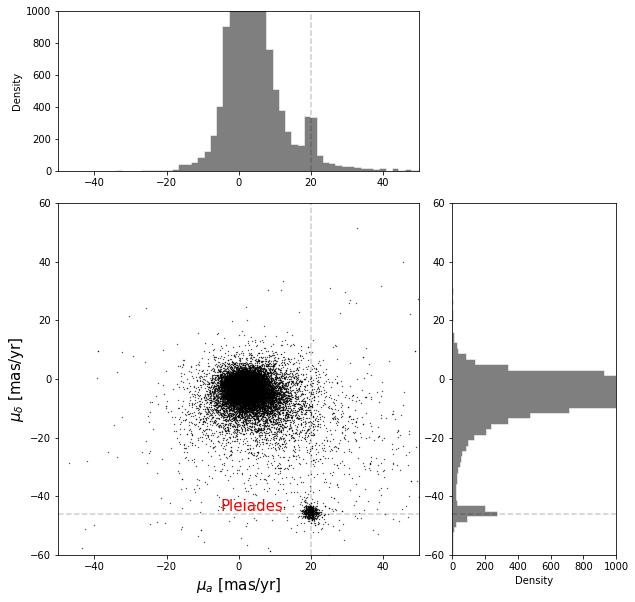

In [303]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

ax_main.scatter(pl_pmra, pl_pmdec,marker='o', s=0.1, color='k')
ax_main.axhline(-46, color='k', ls='--', alpha=0.2)
ax_main.axvline(20, color='k', ls='--', alpha=0.2)

ax_main.set_xlabel('$\mu_{a}$ [mas/yr]', fontsize=15)
ax_main.set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=15)
ax_main.text(-5, -45, 'Pleiades', fontsize=15, color='red')


ax_xDist.hist(pl_pmra,bins=120,align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_xDist.set(ylabel='Density')
ax_xDist.set_xlim(-50,50)
ax_xDist.set_ylim(0,1000)
ax_xDist.axvline(20, color='k', ls='--', alpha=0.2)


ax_yDist.hist(pl_pmdec,bins=80,orientation='horizontal',align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_yDist.set(xlabel='Density')
ax_yDist.set_xlim(0,1000)
ax_yDist.set_ylim(-60,60)
ax_yDist.axhline(-46, color='k', ls='--', alpha=0.2)

#plt.savefig('mot_pl.png', type='png')

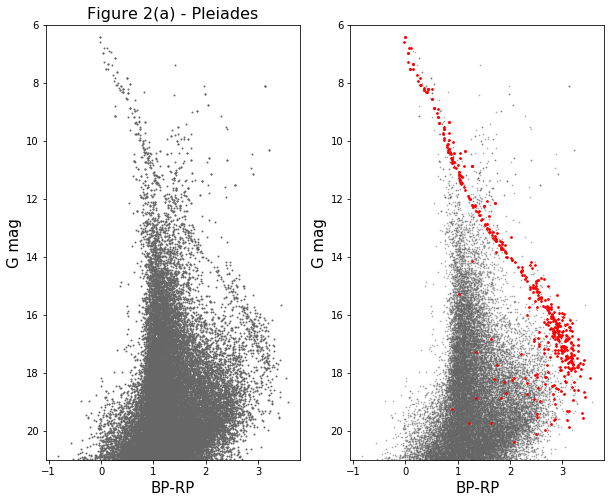

In [302]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax[0].scatter(pl_bprp, pl_gmag, s=.9, color='#666666')
ax[0].set_xlabel('BP-RP', fontsize=15)
ax[0].set_ylabel('G mag', fontsize=15)
ax[0].set_ylim(ax[0].set_ylim(6,21)[::-1])
ax[0].set_title('Figure 2(a) - Pleiades', size=16)


# Select based on pmra, pmdec and parallax
ple = np.where((pl_pmra>18) & (pl_pmra<22) & (pl_pmdec>-58) & (pl_pmdec<-39) & (pl['parallax'] > 5.5) & (pl['parallax'] < 8))

ax[1].scatter(pl_bprp, pl_gmag, s=.4, color='#666666', alpha=0.5)
ax[1].scatter(pl_bprp[ple], pl_gmag[ple], s=3, color='red', marker='o')


ax[1].set_xlabel('BP-RP', fontsize=15)
ax[1].set_ylabel('G mag', fontsize=15)
ax[1].set_ylim(ax[1].set_ylim(6,21)[::-1])

#plt.savefig('cmd_ple.png', type='png')


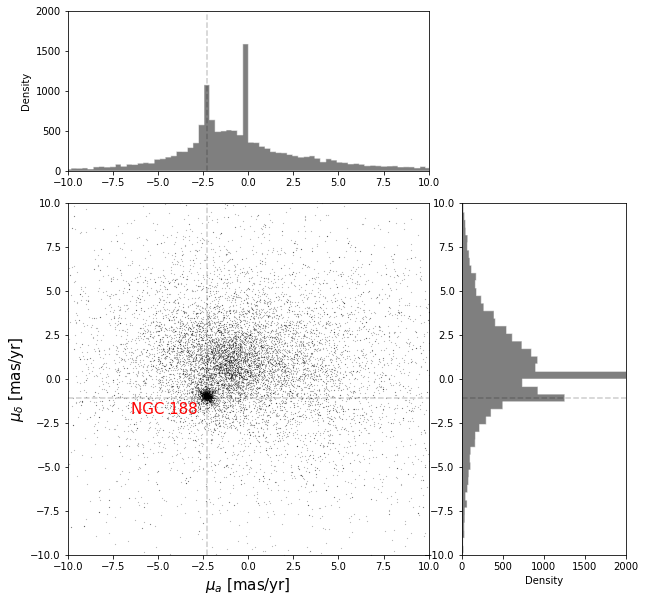

In [304]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

ax_main.scatter(ngc_pmra, ngc_pmdec,marker='o', s=0.01, color='k')
ax_main.axhline(-1.1, color='k', ls='--', alpha=0.2)
ax_main.axvline(-2.3, color='k', ls='--', alpha=0.2)

ax_main.set_xlabel('$\mu_{a}$ [mas/yr]', fontsize=15)
ax_main.set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=15)
ax_main.text(-6.5, -2, 'NGC 188', fontsize=15, color='red')


ax_xDist.hist(ngc_pmra,bins=500,align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_xDist.set(ylabel='Density')
ax_xDist.set_xlim(-10,10)
ax_xDist.set_ylim(0,2000)
ax_xDist.axvline(-2.3, color='k', ls='--', alpha=0.2)


ax_yDist.hist(ngc_pmdec,bins=300,orientation='horizontal',align='mid', color='k', alpha=0.5, histtype='stepfilled', 
             edgecolor='white')
ax_yDist.set(xlabel='Density')
ax_yDist.set_xlim(0,2000)
ax_yDist.set_ylim(-10,10)
ax_yDist.axhline(-1.1, color='k', ls='--', alpha=0.2)

#plt.savefig('mot_ngc.png', type='png')

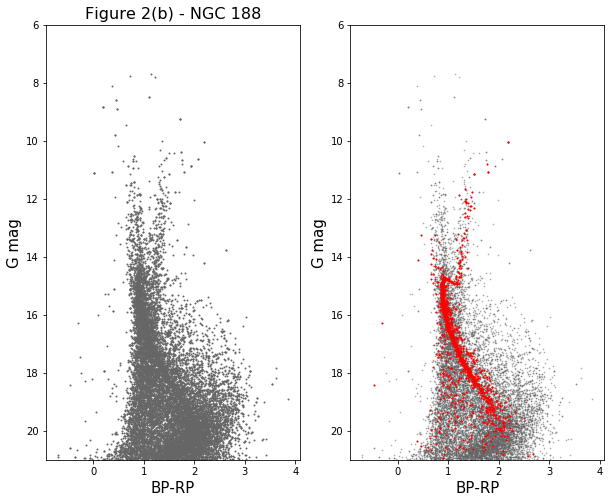

In [305]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax[0].scatter(ngc_bprp, ngc_gmag, s=.9, color='#666666')
ax[0].set_xlabel('BP-RP', fontsize=15)
ax[0].set_ylabel('G mag', fontsize=15)
ax[0].set_ylim(ax[0].set_ylim(6,21)[::-1])
ax[0].set_title('Figure 2(b) - NGC 188', size=16)


# Select based on pmra, pmdec and parallax
ples = np.where((ngc_pmra>-2.9) & (ngc_pmra<-1.1) & (ngc_pmdec>-2.5) & (ngc_pmdec<0) & (ngc['parallax'] > 0) & (ngc['parallax'] < 0.6))

ax[1].scatter(ngc_bprp, ngc_gmag, s=.4, color='#666666', alpha=0.5)
ax[1].scatter(ngc_bprp[ples], ngc_gmag[ples], s=1, color='red', marker='o')


ax[1].set_xlabel('BP-RP', fontsize=15)
ax[1].set_ylabel('G mag', fontsize=15)
ax[1].set_ylim(ax[1].set_ylim(6,21)[::-1])

#plt.savefig('cmd_ngc.png', type='png')


In [4]:
import h5py

/Users/iraf1/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [36]:
df = h5py.File("/Users/iraf1/Downloads/gaia_spectro.hdf5", "r+")
id_sanders = list(df['data']['source_id'])
jz = list(df['data']['Jz'])
jr = list(df['data']['JR'])
lz = list(df['data']['Lz'])
l, b = list(df['data']['l']), list(df['data']['b'])
ra, dec = list(df['data']['ra']), list(df['data']['dec'])

In [38]:
from astropy.io import fits

In [40]:
da = fits.open("/Users/iraf1/Downloads/apStar-r8-2M03343803+7133452.fits")

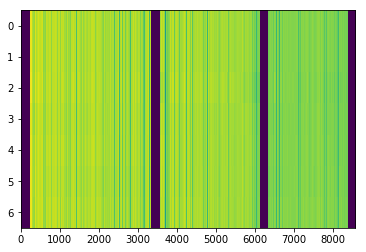

In [105]:
inf = da[1]

plt.imshow(inf.data, aspect='auto')

In [10]:
# crossmatch id's to find pleiades and NGC 188 stars
id_sanders = np.sort(np.array(id_sanders))
jz = np.array(jz)
jr = np.array(jr)
lz = np.array(lz)
sanders = np.ndarray(shape=(len(jz),4))
sanders[:,0] = id_sanders
sanders[:,1], sanders[:,2], sanders[:,3] = jz, jr, lz

In [33]:
San = Table(sanders, names=('source_id', 'jz', 'jr', 'lz'))
PL = Table([pl_ids, pl_pmra, pl_pmdec, pl_gmag, pl_bprp], names=('source_id', 'pmra', 'pmdec', 'gmag', 'bprp'))
NGC = Table([ngc_ids, ngc_pmra, ngc_pmdec, ngc_gmag, ngc_bprp], names=('source_id', 'pmra', 'pmdec', 'gmag', 'bprp'))


In [34]:
San.write('sanders.vot', format='votable' )

In [35]:
PL.write('PL.vot', format='votable')
NGC.write('NGC.vot', format='votable')